### Introdução

#### O All-Star Game é um evento anual da NBA (National Basketball Association) que reúne os melhores jogadores da liga em um jogo festivo. O jogo é dividido em duas equipes, a equipe do Leste e a equipe do Oeste, compostas por jogadores que são escolhidos por votação popular dos fãs, votação dos jogadores e votação da imprensa esportiva. Cada equipe é liderada por um treinador que é selecionado com base em seus resultados na temporada anterior.

#### O objetivo deste projeto é, a partir de aprendizado de máquina, tentar prever se o jogador será escolhido como um All Star.

#### Esta parte do projeto é uma continuação do projeto de análise exploratória e seu dataset foi retirado de https://www.kaggle.com/datasets/drgilermo/nba-players-stats?select=Seasons_Stats.csv 

#### O dataset verificando se o jogador foi um all star foi criado no notebook anterior (nba_eda.ipynb).

### Importando bibliotecas e datasets

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dtype_diet import report_on_dataframe #otimiza uso de memória verificando o tipo de cada variável e sugerindo o tipo que melhor se adequa
from dtype_diet import optimize_dtypes #transforma as variaveis nos tipos sugeridos
import sidetable as stb #utilizando stb.flatten() ele deixa um df groupby flat

pd.set_option('display.max_columns', None)

In [45]:
allstars = pd.read_csv('data/all_stars.csv', sep=';')
stats = pd.read_csv('data/Seasons_Stats.csv')
allstars.columns

Index(['player', 'year', 'all_star'], dtype='object')

In [46]:
stats = stats.drop(columns=['Unnamed: 0','blanl','blank2'], axis=1)

In [47]:
stats = stats.drop(index=stats[stats.Year.isnull()].index)

In [48]:
stats['year'] = stats.Year.astype(int)
stats['player'] = stats.Player.apply(lambda x: x.replace('*',''))
stats = stats.drop(columns=['Year','Player'], axis=1)

In [49]:
stats = stats.sort_values(by=['year','player'])
allstars = allstars.sort_values(by=['year','player'])

In [50]:
allstars = allstars.drop(index=allstars[allstars.year < 1950].index, axis=0)

In [51]:
stats

,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year,player
32,PG,32.0,SYR,56.0,NaN,NaN,NaN,0.491,NaN,0.803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9,3.4,9.3,NaN,NaN,NaN,NaN,NaN,143.0,431.0,0.332,NaN,NaN,NaN,143.0,431.0,0.332,0.332,287.0,346.0,0.829,NaN,NaN,NaN,264.0,NaN,NaN,NaN,223.0,573.0,1950,Al Cervi
85,F-G,24.0,TOT,57.0,NaN,NaN,NaN,0.333,NaN,0.167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9,-0.1,-1.0,NaN,NaN,NaN,NaN,NaN,93.0,299.0,0.311,NaN,NaN,NaN,93.0,299.0,0.311,0.311,28.0,50.0,0.560,NaN,NaN,NaN,95.0,NaN,NaN,NaN,143.0,214.0,1950,Al Guokas
86,F-G,24.0,DNN,41.0,NaN,NaN,NaN,0.338,NaN,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.7,-0.4,-1.1,NaN,NaN,NaN,NaN,NaN,86.0,271.0,0.317,NaN,NaN,NaN,86.0,271.0,0.317,0.317,25.0,47.0,0.532,NaN,NaN,NaN,85.0,NaN,NaN,NaN,116.0,197.0,1950,Al Guokas
87,F-G,24.0,PHW,16.0,NaN,NaN,NaN,0.290,NaN,0.107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.2,0.3,0.1,NaN,NaN,NaN,NaN,NaN,7.0,28.0,0.250,NaN,NaN,NaN,7.0,28.0,0.250,0.250,3.0,3.0,1.000,NaN,NaN,NaN,10.0,NaN,NaN,NaN,27.0,17.0,1950,Al Guokas
174,C,21.0,WAT,8.0,NaN,NaN,NaN,0.446,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,0.0,0.1,NaN,NaN,NaN,NaN,NaN,5.0,21.0,0.238,NaN,NaN,NaN,5.0,21.0,0.238,0.238,17.0,21.0,0.810,NaN,NaN,NaN,4.0,NaN,NaN,NaN,22.0,27.0,1950,Al Miksis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24260,PG,23.0,BRK,10.0,0.0,151.0,6.5,0.482,0.551,0.327,2.8,5.5,4.2,16.9,0.6,1.0,20.0,19.9,-0.2,0.0,-0.2,-0.050,-4.0,-3.3,-7.3,-0.2,18.0,49.0,0.367,8.0,27.0,0.296,10.0,22.0,0.455,0.449,10.0,16.0,0.625,4.0,8.0,12.0,17.0,2.0,2.0,14.0,11.0,54.0,2017,Yogi Ferrell
24261,PG,23.0,DAL,36.0,29.0,1046.0,14.1,0.541,0.432,0.212,1.7,9.7,5.5,24.1,2.0,0.6,12.9,19.5,1.0,0.9,2.0,0.090,0.5,-0.3,0.2,0.6,142.0,345.0,0.412,60.0,149.0,0.403,82.0,196.0,0.418,0.499,64.0,73.0,0.877,16.0,83.0,99.0,155.0,40.0,7.0,56.0,79.0,408.0,2017,Yogi Ferrell
24408,SG,21.0,MIN,47.0,47.0,1749.0,14.6,0.576,0.437,0.197,1.2,9.5,5.3,12.6,1.2,0.5,9.9,21.7,2.5,0.4,3.0,0.082,2.1,-2.4,-0.3,0.8,326.0,710.0,0.459,120.0,310.0,0.387,206.0,400.0,0.515,0.544,117.0,140.0,0.836,18.0,141.0,159.0,139.0,41.0,10.0,85.0,104.0,889.0,2017,Zach LaVine
24550,PF,35.0,MEM,73.0,5.0,1786.0,18.5,0.490,0.098,0.200,11.3,27.4,19.1,13.5,1.1,0.5,8.6,29.2,0.8,2.4,3.2,0.086,-1.4,-0.7,-2.1,0.0,433.0,964.0,0.449,21.0,94.0,0.223,412.0,870.0,0.474,0.460,141.0,193.0,0.731,182.0,416.0,598.0,122.0,38.0,10.0,99.0,136.0,1028.0,2017,Zach Randolph


In [52]:
df = stats.merge(allstars, how='inner', on=['player','year'])

In [53]:
df = df.drop_duplicates()

In [54]:
df.shape

(23141, 51)

In [55]:
df.isnull().sum()

Pos            0
Age            8
Tm             0
G              0
GS          6211
MP           479
PER          515
TS%           81
3PAr        5627
FTr           94
ORB%        3745
DRB%        3745
TRB%        2988
AST%        2034
STL%        3745
BLK%        3745
TOV%        4906
USG%        4851
OWS           39
DWS           39
WS            39
WS/48        515
OBPM        3741
DBPM        3741
BPM         3741
VORP        3741
FG             0
FGA            0
FG%           94
3P          5543
3PA         5543
3P%         8829
2P             0
2PA            0
2P%          122
eFG%          94
FT             0
FTA            0
FT%          801
ORB         3741
DRB         3741
TRB          306
AST            0
STL         3741
BLK         3741
TOV         4847
PF             0
PTS            0
year           0
player         0
all_star       0
dtype: int64

In [56]:
df.head()

,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year,player,all_star
0,PG,32.0,SYR,56.0,NaN,NaN,NaN,0.491,NaN,0.803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9,3.4,9.3,NaN,NaN,NaN,NaN,NaN,143.0,431.0,0.332,NaN,NaN,NaN,143.0,431.0,0.332,0.332,287.0,346.0,0.829,NaN,NaN,NaN,264.0,NaN,NaN,NaN,223.0,573.0,1950,Al Cervi,0
1,F-G,24.0,TOT,57.0,NaN,NaN,NaN,0.333,NaN,0.167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9,-0.1,-1.0,NaN,NaN,NaN,NaN,NaN,93.0,299.0,0.311,NaN,NaN,NaN,93.0,299.0,0.311,0.311,28.0,50.0,0.560,NaN,NaN,NaN,95.0,NaN,NaN,NaN,143.0,214.0,1950,Al Guokas,0
4,F-G,24.0,DNN,41.0,NaN,NaN,NaN,0.338,NaN,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.7,-0.4,-1.1,NaN,NaN,NaN,NaN,NaN,86.0,271.0,0.317,NaN,NaN,NaN,86.0,271.0,0.317,0.317,25.0,47.0,0.532,NaN,NaN,NaN,85.0,NaN,NaN,NaN,116.0,197.0,1950,Al Guokas,0
7,F-G,24.0,PHW,16.0,NaN,NaN,NaN,0.290,NaN,0.107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.2,0.3,0.1,NaN,NaN,NaN,NaN,NaN,7.0,28.0,0.250,NaN,NaN,NaN,7.0,28.0,0.250,0.250,3.0,3.0,1.000,NaN,NaN,NaN,10.0,NaN,NaN,NaN,27.0,17.0,1950,Al Guokas,0
10,C,21.0,WAT,8.0,NaN,NaN,NaN,0.446,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,0.0,0.1,NaN,NaN,NaN,NaN,NaN,5.0,21.0,0.238,NaN,NaN,NaN,5.0,21.0,0.238,0.238,17.0,21.0,0.810,NaN,NaN,NaN,4.0,NaN,NaN,NaN,22.0,27.0,1950,Al Miksis,0


In [57]:
optimizes_df = report_on_dataframe(df, unit="MB")
optimizes_df

,Current dtype,Proposed dtype,Current Memory (MB),Proposed Memory (MB),Ram Usage Improvement (MB),Ram Usage Improvement (%)
Column,,,,,,
Pos,object,category,755.157715,102.644531,652.513184,86.407537
Age,float64,float16,180.789062,112.993164,67.795898,37.500000
Tm,object,category,768.353516,104.742676,663.610840,86.367906
G,float64,float16,180.789062,112.993164,67.795898,37.500000
GS,float64,float16,180.789062,112.993164,67.795898,37.500000
MP,float64,float32,180.789062,135.591797,45.197266,25.000000
PER,float64,None,180.789062,NaN,NaN,NaN
TS%,float64,None,180.789062,NaN,NaN,NaN
3PAr,float64,None,180.789062,NaN,NaN,NaN


In [58]:
df_opt = optimize_dtypes(df, optimizes_df)

print(f'Original df memory: {df.memory_usage(deep=True).sum()/1024/1024:.2f} MB')
print(f'Propsed df memory: {df_opt.memory_usage(deep=True).sum()/1024/1024:.2f} MB')

Original df memory: 12.72 MB
Propsed df memory: 6.31 MB


In [59]:
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23141 entries, 0 to 35733
Data columns (total 51 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pos       23141 non-null  category
 1   Age       23133 non-null  float16 
 2   Tm        23141 non-null  category
 3   G         23141 non-null  float16 
 4   GS        16930 non-null  float16 
 5   MP        22662 non-null  float32 
 6   PER       22626 non-null  float64 
 7   TS%       23060 non-null  float64 
 8   3PAr      17514 non-null  float64 
 9   FTr       23047 non-null  float64 
 10  ORB%      19396 non-null  float64 
 11  DRB%      19396 non-null  float64 
 12  TRB%      20153 non-null  float64 
 13  AST%      21107 non-null  float64 
 14  STL%      19396 non-null  float64 
 15  BLK%      19396 non-null  float64 
 16  TOV%      18235 non-null  float64 
 17  USG%      18290 non-null  float64 
 18  OWS       23102 non-null  float64 
 19  DWS       23102 non-null  float64 
 20  WS    

In [60]:
df_opt.player = df_opt.player.astype('object')

In [61]:
df = df_opt

### Análise exploratória

In [62]:
df.tail()

,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year,player,all_star
35725,PG,23.0,BRK,10.0,0.0,151.0,6.5,0.482,0.551,0.327,2.8,5.5,4.2,16.9,0.6,1.0,20.0,19.9,-0.2,0.0,-0.2,-0.050,-4.0,-3.3,-7.3,-0.2,18.0,49.0,0.367,8.0,27.0,0.296,10.0,22.0,0.455,0.449,10.0,16.0,0.625,4.0,8.0,12.0,17.0,2.0,2.0,14.0,11.0,54.0,2017,Yogi Ferrell,0
35728,PG,23.0,DAL,36.0,29.0,1046.0,14.1,0.541,0.432,0.212,1.7,9.7,5.5,24.1,2.0,0.6,12.9,19.5,1.0,0.9,2.0,0.090,0.5,-0.3,0.2,0.6,142.0,345.0,0.412,60.0,149.0,0.403,82.0,196.0,0.418,0.499,64.0,73.0,0.877,16.0,83.0,99.0,155.0,40.0,7.0,56.0,79.0,408.0,2017,Yogi Ferrell,0
35731,SG,21.0,MIN,47.0,47.0,1749.0,14.6,0.576,0.437,0.197,1.2,9.5,5.3,12.6,1.2,0.5,9.9,21.7,2.5,0.4,3.0,0.082,2.1,-2.4,-0.3,0.8,326.0,710.0,0.459,120.0,310.0,0.387,206.0,400.0,0.515,0.544,117.0,140.0,0.836,18.0,141.0,159.0,139.0,41.0,10.0,85.0,104.0,889.0,2017,Zach LaVine,0
35732,PF,35.0,MEM,73.0,5.0,1786.0,18.5,0.490,0.098,0.200,11.3,27.4,19.1,13.5,1.1,0.5,8.6,29.2,0.8,2.4,3.2,0.086,-1.4,-0.7,-2.1,0.0,433.0,964.0,0.449,21.0,94.0,0.223,412.0,870.0,0.474,0.460,141.0,193.0,0.731,182.0,416.0,598.0,122.0,38.0,10.0,99.0,136.0,1028.0,2017,Zach Randolph,0
35733,C,32.0,GSW,70.0,70.0,1268.0,16.1,0.588,0.007,0.410,12.9,22.0,17.7,13.6,2.2,2.0,19.5,15.3,2.2,2.5,4.7,0.177,-0.3,3.0,2.7,1.5,164.0,307.0,0.534,0.0,2.0,0.000,164.0,305.0,0.538,0.534,98.0,126.0,0.778,140.0,270.0,410.0,132.0,59.0,33.0,88.0,166.0,426.0,2017,Zaza Pachulia,0


Text(0, 0.5, 'Teams')

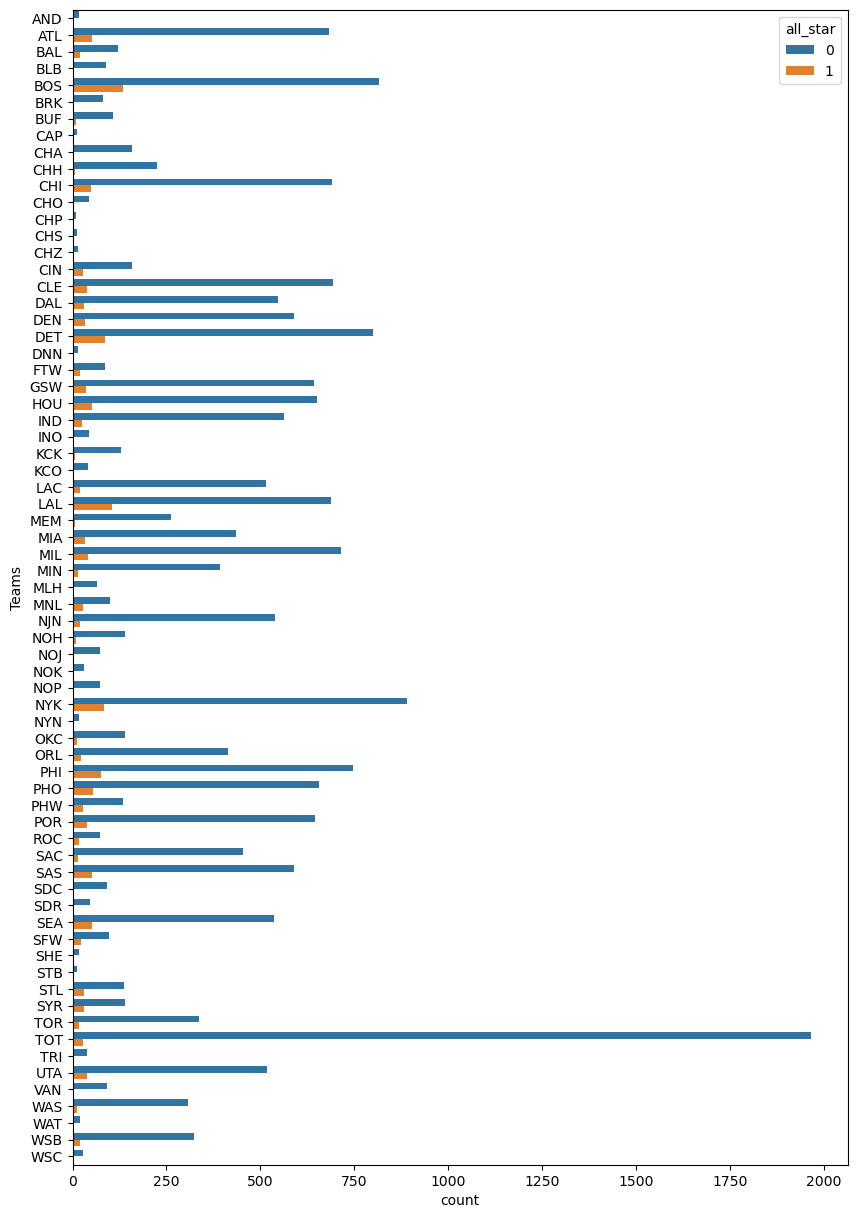

In [63]:
plt.figure(figsize=(10,15))
sns.countplot(df, y='Tm', hue='all_star')
plt.ylabel('Teams')

Podemos verificar uma anormalidade no gráfico acima, o time 'TOT' possui quase 2000 jogadores enquanto o resto não passou de 1000. Após pesquisas verificamos que 'TOT' não se trata de um time e sim de uma sigla que significa "Two Other Teams", indicando que o jogador atuou em dois ou mais times naquele mesmo ano.

In [64]:
df['Pos'].unique()

['PG', 'F-G', 'C', 'PF', 'F-C', ..., 'C-SF', 'SG-SF', 'PG-SG', 'PG-SF', 'SG-PF']
Length: 23
Categories (23, object): ['C', 'C-F', 'C-PF', 'C-SF', ..., 'SG', 'SG-PF', 'SG-PG', 'SG-SF']

In [65]:
df_per_game = df.copy()
number_games = df['G']
df_per_game['PTS/game'] = df_per_game['PTS']/number_games
df_per_game['FG/game'] = df_per_game['FG']/number_games

In [66]:
df_per_game.corr()['all_star'] 

C:\Users\danil\AppData\Local\Temp\ipykernel_2188\645304306.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_per_game.corr()['all_star']


Age         0.058002
G           0.224779
GS          0.394507
MP          0.423603
PER         0.359392
TS%         0.136152
3PAr       -0.037463
FTr         0.073127
ORB%       -0.000294
DRB%        0.091914
TRB%        0.063194
AST%        0.178687
STL%        0.040449
BLK%        0.045710
TOV%       -0.073059
USG%        0.305376
OWS         0.568690
DWS         0.460426
WS          0.587270
WS/48       0.261979
OBPM        0.307678
DBPM        0.122713
BPM         0.307205
VORP        0.590870
FG          0.533912
FGA         0.523306
FG%         0.114413
3P          0.196358
3PA         0.203123
3P%         0.039354
2P          0.537304
2PA         0.531073
2P%         0.098396
eFG%        0.093908
FT          0.586628
FTA         0.580747
FT%         0.109893
ORB         0.299172
DRB         0.403260
TRB         0.429996
AST         0.393800
STL         0.362329
BLK         0.294147
TOV         0.443695
PF          0.288932
PTS         0.550731
year       -0.110397
all_star    1

<AxesSubplot: xlabel='FG', ylabel='3P'>

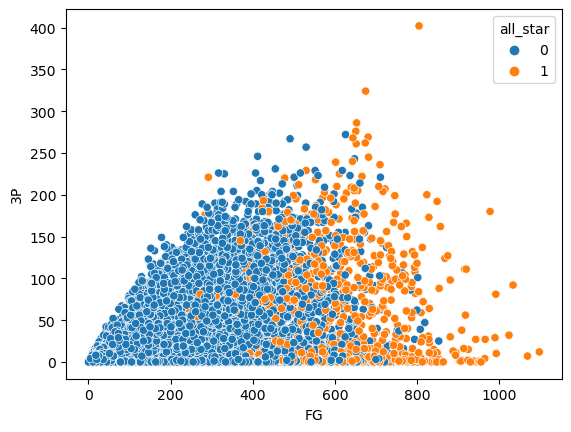

In [67]:
sns.scatterplot(df, x='FG', y='3P', hue='all_star')

### Pré processamento e tratamento de dados

#### Os seguintes tratamentos devem ser levados em conta para a criação do pipeline:
- #### Imputação de valores missing (Single Imputer)
- #### Transformação de variável categórica em numérica (One-Hot Encoder)
- #### Mudança de escala (Standard Scaler)
- #### Redução de dimensionalidade e criação de variáveis combinadas

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X = df.drop(columns=['all_star'], axis = 1)   #features
y = df['all_star'] #target

print(X.shape[0], y.shape[0])

23141 23141


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

In [71]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [72]:
from sklearn.pipeline import make_pipeline

def num_pipeline():
    return  make_pipeline(
        SimpleImputer(strategy='median'),
        StandardScaler()
        )

def cat_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore", sparse=False)
        )

In [73]:
from sklearn.compose import ColumnTransformer, make_column_selector

preprocessing = ColumnTransformer([    #Necessita nomear as etapas
    ('num', num_pipeline(), make_column_selector(dtype_include=[np.number])),
    ('cat', cat_pipeline(), make_column_selector(dtype_include=object)),
])

In [74]:
all_star_pre = preprocessing.fit_transform(X_train)

c:\Users\danil\anaconda3\envs\DS\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
all_star_pca = pca.fit_transform(all_star_pre)
all_star_pca

array([[ 4.87063937, -0.53248938],
       [ 5.82607456, -2.34379114],
       [ 0.14077086,  2.16087979],
       ...,
       [-2.72274225,  1.77182302],
       [-3.86909887,  4.02565501],
       [-3.04828933,  0.0739533 ]])

<AxesSubplot: >

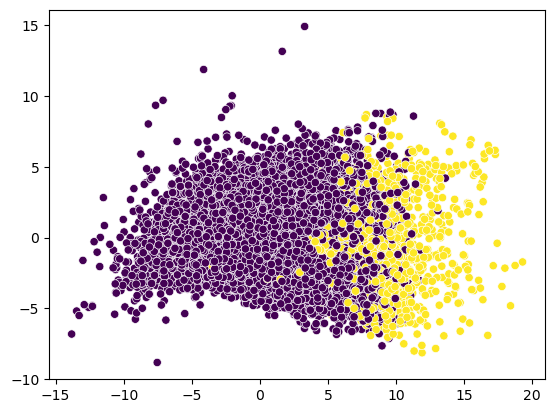

In [76]:
sns.scatterplot(x=all_star_pca[:,0], y=all_star_pca[:,1], c=y_train)

### Criando o modelo de machine learning

#### Modelo 0 : Dummy

In [77]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy = make_pipeline(preprocessing, DummyClassifier())
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_train)

dummy_score = accuracy_score(y_train, y_pred_dummy)
dummy_score

c:\Users\danil\anaconda3\envs\DS\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9303694900605013

#### Modelo 1 : Random Forest


In [78]:
#Treinando o modelo

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

ran_for = make_pipeline(preprocessing, RandomForestClassifier(random_state=42, class_weight='balanced'))
ran_for.fit(X_train, y_train)

#Avaliando o modelo

y_pred_rf = ran_for.predict(X_train)

ran_for_acc = accuracy_score(y_train, y_pred_rf)
print(ran_for_acc)

ran_for_f1score = f1_score(y_train, y_pred_rf)
print(ran_for_f1score)

ran_for_cm = confusion_matrix(y_train, y_pred_rf)
print(ran_for_cm)

c:\Users\danil\anaconda3\envs\DS\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9999459809853068
0.9996122528111672
[[17222     1]
 [    0  1289]]


In [79]:
from sklearn.model_selection import cross_val_score

cross_val_rf = cross_val_score(ran_for, X_train, y_train, scoring="f1", cv=5)
cross_val_rf

pd.Series(cross_val_rf).describe()

c:\Users\danil\anaconda3\envs\DS\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\danil\anaconda3\envs\DS\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\danil\anaconda3\envs\DS\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\danil\anaconda3\envs\DS\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 

count    5.000000
mean     0.692083
std      0.039571
min      0.654378
25%      0.663657
50%      0.689977
75%      0.697039
max      0.755365
dtype: float64

In [80]:
y_pred_rf_test = ran_for.predict(X_test)
ran_for_cm_test = confusion_matrix(y_test, y_pred_rf_test)
ran_for_cm_test

array([[4278,   33],
       [ 138,  180]], dtype=int64)

In [81]:
ran_for_f1score = f1_score(y_test, y_pred_rf_test)
print(ran_for_f1score)

0.6779661016949151


#### Modelo 2 : Regressão Logística

In [82]:
from sklearn.linear_model import LogisticRegression

log_reg = make_pipeline(preprocessing, LogisticRegression())
log_reg.fit(X_train, y_train)

c:\Users\danil\anaconda3\envs\DS\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\danil\anaconda3\envs\DS\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF52EA1D90>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF4ECB5D90>)])),
                ('logisticregression', LogisticRegression())])

In [83]:
y_pred_lr = log_reg.predict(X_train)

log_reg_acc = accuracy_score(y_train, y_pred_lr)
print(log_reg_acc)

log_reg_f1score = f1_score(y_train, y_pred_lr)
print(log_reg_f1score)

log_reg_cm = confusion_matrix(y_train, y_pred_lr)
print(log_reg_cm)

0.9725583405358686
0.7869127516778524
[[17066   157]
 [  351   938]]


c:\Users\danil\anaconda3\envs\DS\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\danil\anaconda3\envs\DS\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\danil\anaconda3\envs\DS\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_

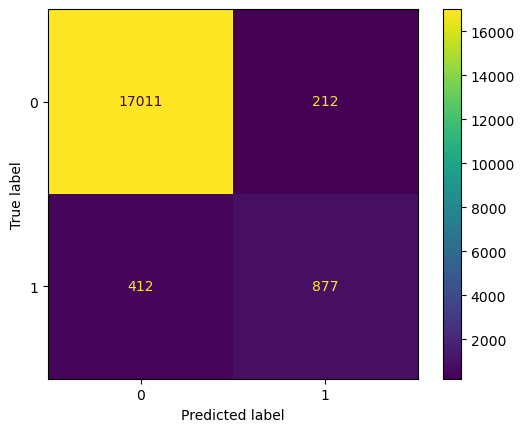

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(log_reg, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()